<a href="https://colab.research.google.com/github/WMaia9/Analise_Preditiva/blob/main/Tarefa_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAS010 - Atividade Avaliada 01 - Regressão Logistica


#### Integrantes do Grupo

Guilherme Nomelini<br>
Luiz Henrique Santos Oliveira<br>
Thandara Santos<br>
Wesley Maia


## 1. carga da base, definições de funções  e estatística descritiva

In [ ]:
#Importação das bibliotecas utilizadas nesse tarbalho

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#função de plotagem     

def plot_decision_regions(X, y, classifier, test_idx=None, n_points=500):

# setup marker generator and color map
    p=['Not Purchased','Purchased']
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    passo_x1 = (x1_max - x1_min)/n_points
    passo_x2 = (x2_max - x2_min)/n_points
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, passo_x1),
                         np.arange(x2_min, x2_max, passo_x2))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, color=cmap(idx),
            marker=markers[idx], label=p[cl],
            edgecolor='black')

    # highlight test samples
        if test_idx:
        # plot all samples
            X_test, y_test = X[test_idx, :], y[test_idx]

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
          color='', edgecolor='black', alpha=1.0,
          linewidth=1, marker='o',
          s=100, label='test set')
        
    plt.title('Logistic Regression')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show() 

In [ ]:
#Visualização e entendimento da base de dados

#considera o arquivo na mesma pasta do notebook
data = 'https://raw.githubusercontent.com/WMaia9/Analise_Preditiva/main/Social_Network_Ads.csv'
df = pd.read_csv(data)

print('----------------------\nInformações gerais\n----------------------')
print(df.info(),'\n\n')

print('--------------------------------\nEstatística descritiva da base\n--------------------------------')
print(df.describe(),'\n\n')


df.head()

----------------------
Informações gerais
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None 


--------------------------------
Estatística descritiva da base
--------------------------------
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000 




,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## 2. Modelo sem regularização

In [ ]:
#Split da base de dados entre Treino e teste


X = np.array(df.drop('Purchased',axis=1))   #Var independentes
y = df.Purchased.values                     #Var dependente

#considera 30% da base para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#### 2.1 Modelo sem tunagem

In [ ]:
#treinamento do modelo

lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

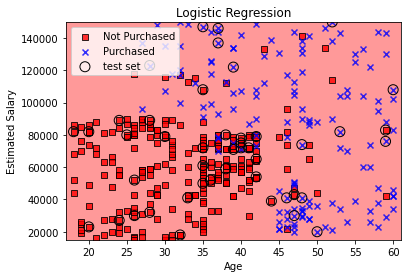

In [ ]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=model, test_idx=range(105, 150), n_points=500)

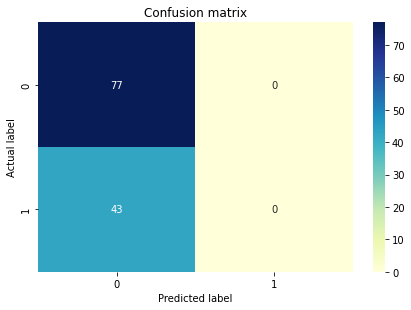

In [ ]:
#Matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#gráfico
a = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
a = plt.tight_layout()
a = plt.title('Confusion matrix', y=1.1)
a = plt.ylabel('Actual label')
a = plt.xlabel('Predicted label')

In [ ]:
#Métricas de acuracidade
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        77
           1       0.00      0.00      0.00        43

    accuracy                           0.64       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.41      0.64      0.50       120



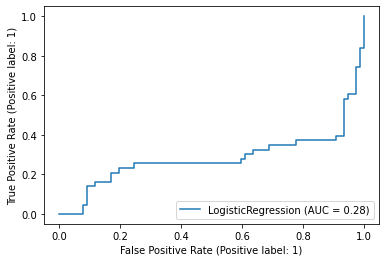

In [ ]:
plot_roc_curve(lr, X_test, y_test);

#### 2.2 Tunagem do modelo

In [ ]:
#treinamento do modelo

lr = LogisticRegression(penalty = 'l2', tol = 1e-6, max_iter = 1000, solver = 'liblinear')
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

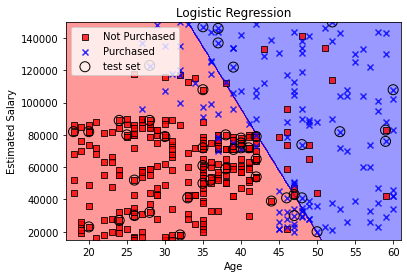

In [ ]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=model, test_idx=range(105, 150), n_points=500)

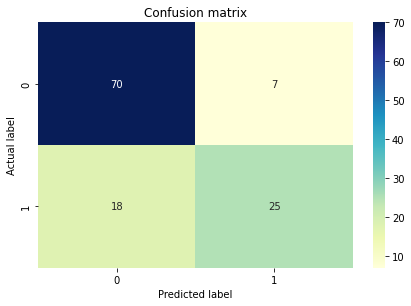

In [ ]:
#Matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#gráfico
a = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
a = plt.tight_layout()
a = plt.title('Confusion matrix', y=1.1)
a = plt.ylabel('Actual label')
a = plt.xlabel('Predicted label')

In [ ]:
#Métricas de acuracidade
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.78      0.58      0.67        43

    accuracy                           0.79       120
   macro avg       0.79      0.75      0.76       120
weighted avg       0.79      0.79      0.78       120



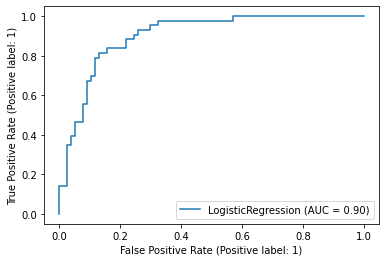

In [ ]:
plot_roc_curve(lr, X_test, y_test);

#### Conclusão para modelo sem regularização

A tunagem do modelo foi muito relevante para uma resposta adequada. 
A escolha do solver foi o parâmetro principal para garantir um bom resultado

## 3. Modelo com regularização

In [ ]:
#Aplica regularização nos dados
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 3.1 Modelo sem tunagem

In [ ]:
#treinamento do modelo

lr = LogisticRegression()
model_std = lr.fit(X_train_std,y_train)
y_pred_std = model_std.predict(X_test_std)

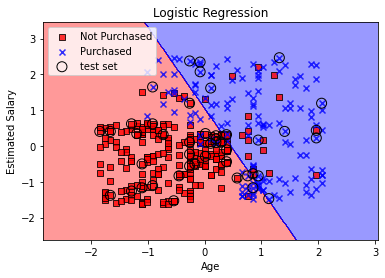

In [ ]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=model_std, test_idx=range(105, 150), n_points=500)

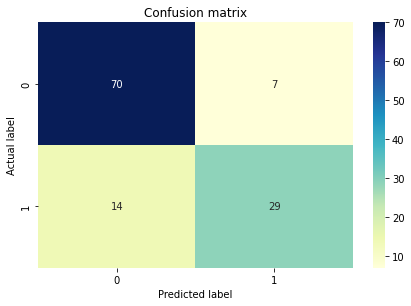

In [ ]:
#Matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_std)

#gráfico
a = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
a = plt.tight_layout()
a = plt.title('Confusion matrix', y=1.1)
a = plt.ylabel('Actual label')
a = plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred_std))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.81      0.67      0.73        43

    accuracy                           0.82       120
   macro avg       0.82      0.79      0.80       120
weighted avg       0.82      0.82      0.82       120



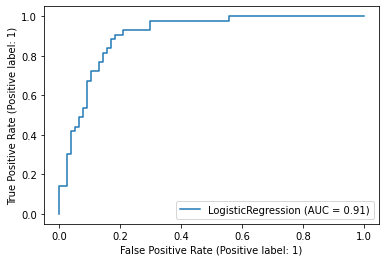

In [ ]:
plot_roc_curve(lr, X_test_std, y_test);

#### 3.2 Tunagem do modelo

In [ ]:
#treinamento do modelo

lr = LogisticRegression(penalty = 'l2', tol = 1e-12, max_iter = 10000, solver = 'liblinear')
model_std = lr.fit(X_train_std,y_train)
y_pred_std = model_std.predict(X_test_std)

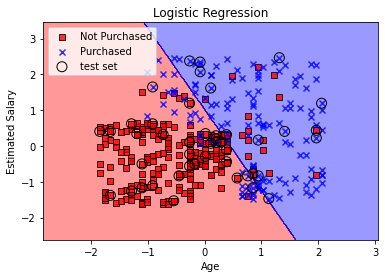

In [ ]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=model_std, test_idx=range(105, 150), n_points=500)

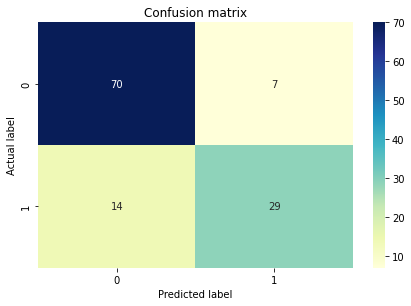

In [ ]:
#Matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_std)

#gráfico
a = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
a = plt.tight_layout()
a = plt.title('Confusion matrix', y=1.1)
a = plt.ylabel('Actual label')
a = plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred_std))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.81      0.67      0.73        43

    accuracy                           0.82       120
   macro avg       0.82      0.79      0.80       120
weighted avg       0.82      0.82      0.82       120



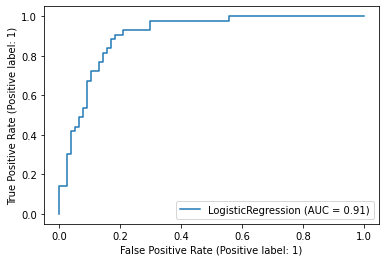

In [ ]:
plot_roc_curve(lr, X_test_std, y_test);

In [ ]:
Accuracy: 0.7916666666666666
Precision: 0.78125
Recall: 0.5813953488372093

#### Concusão para modelo com regularização
A definição dos parâmentros de otimização não resultou em um ganho de performance do modelo.
As métricas de desempenho apresentam resultados idênticos.

## 4. Variando a taxa de aprendizado do Modelo

In [ ]:
!pip install parfit
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

In [ ]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # taxa de aprendizado
    'loss': ['log'], # regressão logistica,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


-------------SCORING MODELS-------------


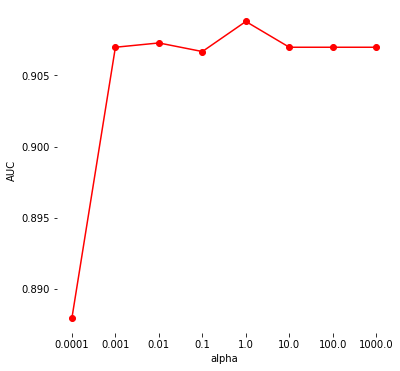

SGDClassifier(alpha=1.0, loss='log', n_jobs=-1) 0.9087888855330716


In [ ]:
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
                                                        X_train_std, y_train, X_test_std, y_test, 
                                                        metric = roc_auc_score, scoreLabel = "AUC")

print(bestModel, bestScore)

## 5. Conclusão geral


A comparação entre o modelo original e o modelo com regularização mostra uma melhora nos resultados que pode ser vista na tabela abaixo, indicando a importância de normalização dos dados.

| Métrica | Modelo original | Modelo regularizado |delta |
| --- | --- | --- |---|
| Accuracy | 0.792 | 0.825 |+ 3.3%|
| Precision | 0.781 | 0.805 |+ 2.4%|
| Recall | 0.581 | 0.674 |+ 9.3%|
| ROC | 0.902 | 0.906 |+ 0.4%|

Podemos ver que utilizando o SGDClassifier e alterando a taxa de aprendizagem obtivemos o melhor modelo com taxa de aprendizado alpha = 1. A curva ROC no melhor modelo foi de 0.908

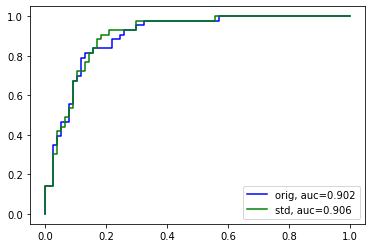

In [ ]:
#comaprativo entre os resultados do modelo original e do regularizado
plt.plot(fpr,tpr,label="orig, auc="+str("{0:0.3f}".format(auc)), color='blue')
plt.plot(fpr_std,tpr_std,label="std, auc="+str("{0:0.3f}".format(auc_std)), color='green')
plt.legend(loc=4)
plt.show() 